# Assignment 4

Name : Ghanashyam Patil  
Roll No : 31162  
Subject : DSBDAL

Problem Statement :  
Perform the following operations using Python
1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to deal with them.   
    a)min max normalization  
    b)z-score normalization   
    c)Box plot 

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
df=pd.read_csv('../Databases/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [128]:
#storing all the columns having numeric datatype
numeric_cols = df.select_dtypes(include='number')
numeric_cols.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


# Removing Outliers

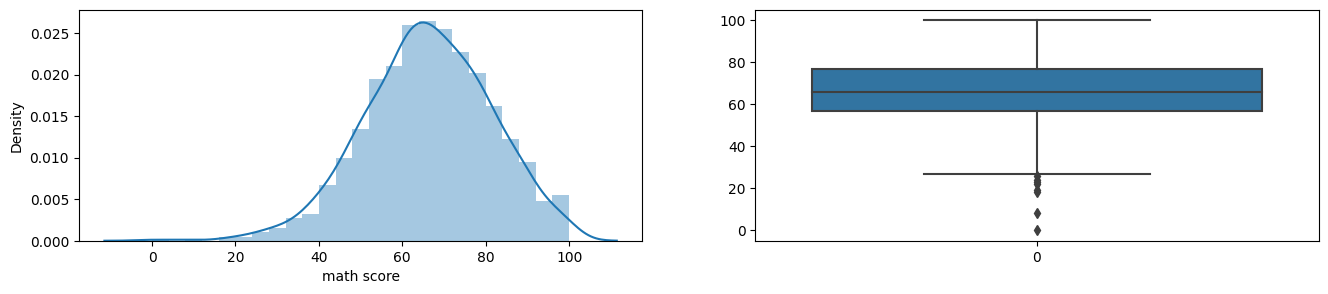

In [129]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
sns.distplot(df['math score'])
plt.subplot(1,2,2)
sns.boxplot(df['math score'])
plt.show()

In [130]:
# printing old shape
print("Old Shape: ", df.shape)

Old Shape:  (1000, 8)


In [131]:
# IQR
# Calculate the upper and lower bounds
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
 
# Creating array of indises of outlier's rows
outliers = np.where((df['math score']<=lower_bound) | (df['math score']>= upper_bound))[0]

# Removing the outliers
df.drop(index=outliers, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (990, 8)


<Axes: >

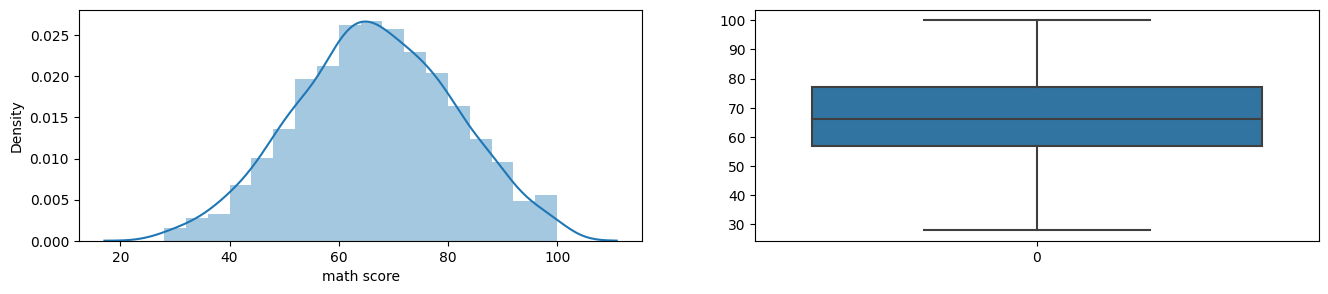

In [132]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
sns.distplot(df['math score'])
plt.subplot(1,2,2)
sns.boxplot(df['math score'])

# Min-Max normalization

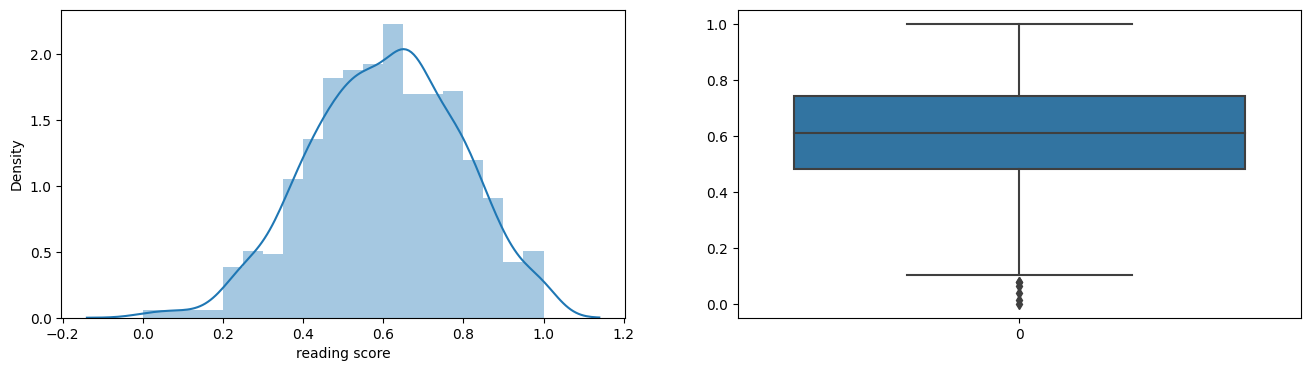

In [133]:
# a) Min-Max normalization
col_data=df['reading score']
normalized_data = (col_data - col_data.min()) / (col_data.max()-col_data.min())
df['reading score']=normalized_data
# normalized_data will be in the range [0, 1]
   
# c) Box plot
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['reading score'])
plt.subplot(1,2,2)
sns.boxplot(df['reading score'])
plt.show()         

# Z-score normalization

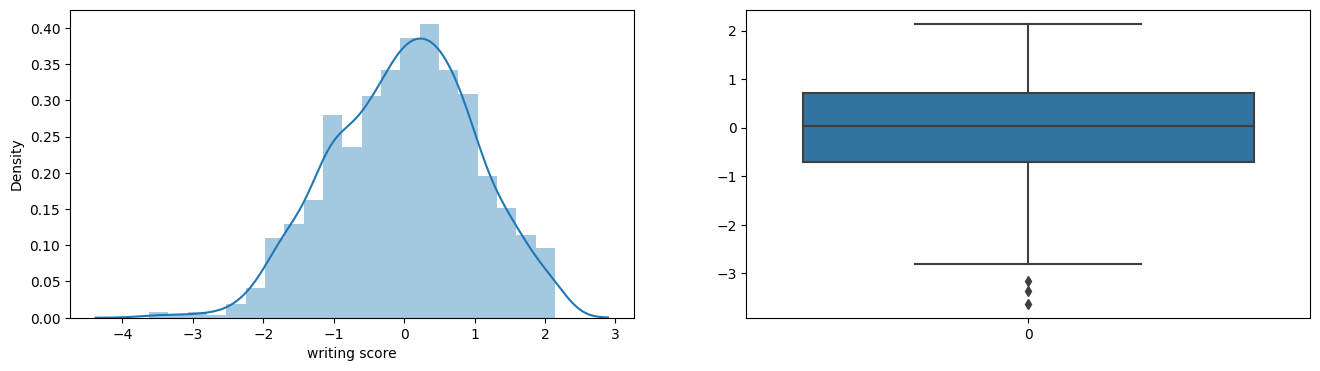

In [134]:
# b) Z-score normalization
col_data=df['writing score']
z_score = (col_data - col_data.mean()) / col_data.std()
# z_score will have mean 0 and standard deviation 1
df['writing score']=z_score

# c) Box plot
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['writing score'])
plt.subplot(1,2,2)
sns.boxplot(df['writing score'])
plt.show() 